# Logistic Regression

We will use logistic regression in this case. 

First we will see why we don't fit linear function on a classification dataset.

## Why we can't use linear function for Logistic Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.array([1,2,3,4,14,15,20,50])
y = np.array([0,0,0,0,1,1,1,1])

# lets say we have a dataset which has two outcomes for output variable 1(True) and 0(False) 

Text(0.5, 1.0, 'Plotting the points of the dataset')

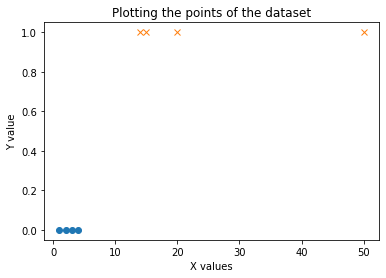

In [3]:
plt.figure()
plt.plot(x[:4],y[:4],'o')
plt.plot(x[4:],y[4:],'x')
plt.xlabel('X values')
plt.ylabel('Y value')
plt.title('Plotting the points of the dataset')

In [4]:
w,b = 1,0
lr =0.0001

In [5]:
for i in range(1000):
  y_pred = w*x + b
  loss = ((y_pred - y)**2).mean()
  dw = (2*(y_pred - y)*x).mean()
  db = (2*(y_pred - y)).mean()
  w = w - dw*lr
  b = b - db*lr

In [6]:
print(w,b)

0.02987083849505491 -0.009820052669942136


Let's say we decide the decision boundary such that if value of y is greater than 0.5 we give the output as 1 otherwise 0. 

In [7]:
x_decision = (0.5 - b)/w

Text(0.5, 1.0, 'Plotting a straight line along with the points')

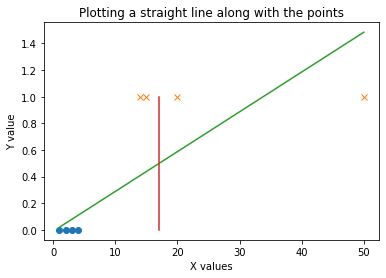

In [8]:
plt.figure()
plt.plot(x[:4],y[:4],'o')
plt.plot(x[4:],y[4:],'x')
plt.plot(x,w*x+b)
plt.plot(8*[x_decision],y)
plt.xlabel('X values')
plt.ylabel('Y value')
plt.title("Plotting a straight line along with the points")

Therefore, two of the points for which we have true as outcome will be falsely classified.

## Building a regularized logistic regression model using TensorFlow


Here, we will use the dataset from kaggle about heart disease using various features such as active smoker or not.

In [9]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [10]:
data = pd.read_csv("framingham.csv")
data.head(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


Now we have to predict the TenYearCHD column from all the previous columns.

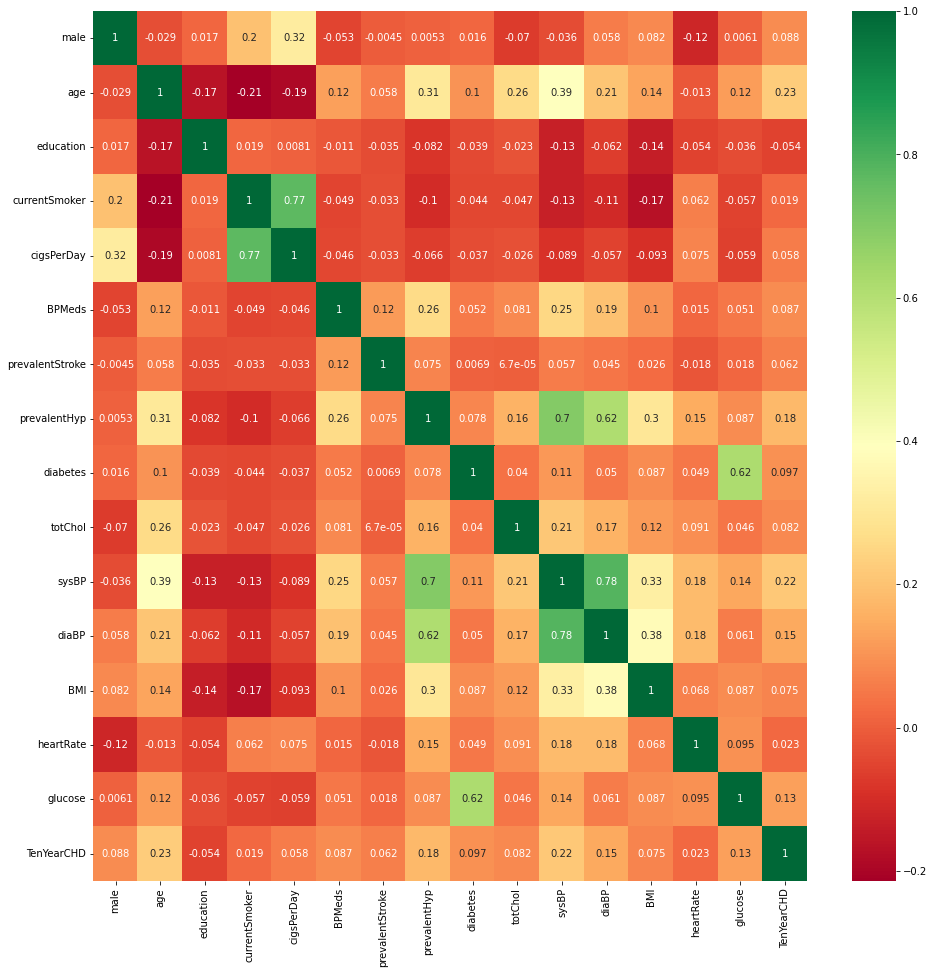

In [11]:
corr_matrix = data.corr()
corr_features = corr_matrix.index
plt.figure(figsize=(16,16))
g=sns.heatmap(data[corr_features].corr(),annot=True,cmap="RdYlGn")

Let's take only those features who have a score of more than 0.1 in the heatmap for the TenYearCHD column

In [12]:
dataset = data[['age','prevalentHyp','sysBP','diaBP','glucose','diabetes','TenYearCHD']]
dataset.head(10)

,age,prevalentHyp,sysBP,diaBP,glucose,diabetes,TenYearCHD
0,39,0,106.0,70.0,77.0,0,0
1,46,0,121.0,81.0,76.0,0,0
2,48,0,127.5,80.0,70.0,0,0
3,61,1,150.0,95.0,103.0,0,1
4,46,0,130.0,84.0,85.0,0,0
5,43,1,180.0,110.0,99.0,0,0
6,63,0,138.0,71.0,85.0,0,1
7,45,0,100.0,71.0,78.0,0,0
8,52,1,141.5,89.0,79.0,0,0
9,43,1,162.0,107.0,88.0,0,0


In [13]:
dataset = dataset[~dataset['glucose'].isnull()]
print(dataset.isnull().sum())

age             0
prevalentHyp    0
sysBP           0
diaBP           0
glucose         0
diabetes        0
TenYearCHD      0
dtype: int64


In [14]:
vif = pd.DataFrame()
vif["features"] = dataset.columns
vif["vif_Factor"] = [variance_inflation_factor(dataset.values, i) for i in range(dataset.shape[1])]
print(vif)

       features  vif_Factor
0           age   34.390370
1  prevalentHyp    2.124433
2         sysBP  132.559728
3         diaBP  103.503290
4       glucose   18.462155
5      diabetes    1.571947
6    TenYearCHD    1.266351


In [15]:
dataset.drop(['sysBP'],inplace = True,axis =1)
vif = pd.DataFrame()
vif["features"] = dataset.columns
vif["vif_Factor"] = [variance_inflation_factor(dataset.values, i) for i in range(dataset.shape[1])]
print(vif)

       features  vif_Factor
0           age   29.104942
1  prevalentHyp    1.814559
2         diaBP   34.653404
3       glucose   18.151531
4      diabetes    1.570990
5    TenYearCHD    1.262061


Now, we will scale the age, diaBP and glucose columns in the dataset so that it will be easier to fit the data.

In [16]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
dataset['age'] = ss.fit_transform(tf.expand_dims(dataset['age'], axis = 1))
dataset['diaBP'] = ss.fit_transform(tf.expand_dims(dataset['diaBP'], axis = 1))
dataset['glucose'] = ss.fit_transform(tf.expand_dims(dataset['glucose'], axis = 1))


In [17]:
data.reset_index(drop = True,inplace = True)
dataset.reset_index(drop = True, inplace = True)

In [18]:
# first we will split the data into training and test data

train_data = dataset.sample(frac = 0.75 , random_state = 1)
test_data = dataset.drop(train_data.index)
print('The number of datapoints for training the model  is ',len(train_data))
print('The number of datapoints for testing the model  is ',len(test_data))

The number of datapoints for training the model  is  2888
The number of datapoints for testing the model  is  962


In [19]:
x_train, y_train = tf.convert_to_tensor(train_data.iloc[:,:-1],dtype = tf.float32),tf.convert_to_tensor(train_data.iloc[:,-1],dtype = tf.float32)
x_test, y_test = tf.convert_to_tensor(test_data.iloc[:,:-1],dtype = tf.float32),tf.convert_to_tensor(test_data.iloc[:,-1],dtype = tf.float32)

In [20]:
# Defining the log loss function 
def log_loss(y_pred, y):
  error  = tf.nn.sigmoid_cross_entropy_with_logits(labels = y, logits = y_pred)
  return tf.reduce_mean(error)

Now we will do the part where we will build the model. 

In [21]:
class Logistic_regression(tf.Module):

  def __init__(self):
    super().__init__()
    w = tf.random.uniform(shape = [5,1])
    b = tf.random.uniform(shape = [1])
    self.w  = tf.Variable(w)
    self.b = tf.Variable(b)
  
  def __call__(self,x):
    z = tf.matmul(x,self.w) + self.b
    return tf.sigmoid(z)

In [22]:
def predict_class(y_pred):
 return tf.cast(y_pred >= 0.5,dtype = tf.float32)

def accuracy(y_pred,y):
  y_pred_class = predict_class(y_pred)
  check_equal = tf.cast(y_pred_class == y, tf.float32)
  acc_val = tf.reduce_mean(check_equal)
  return acc_val


In [23]:
# Now we will proceed to making the batches and shuffling the dataset
batch_size = 100
train_dataset = tf.data.Dataset.from_tensor_slices((x_train,y_train))
train_dataset = train_dataset.shuffle(buffer_size = x_train.shape[0]).batch(batch_size)
test_dataset = tf.data.Dataset.from_tensor_slices((x_test,y_test))
test_dataset = test_dataset.shuffle(buffer_size = x_test.shape[0]).batch(batch_size)

In [24]:
# Setting the hyperparameters for the model 
epochs  = 500
model = Logistic_regression()
lr = 0.01
train_loss,test_loss = [],[]
train_acc, test_acc = [],[]
opt = tf.keras.optimizers.Adam(learning_rate=lr)

In [25]:
# Now let us start the training of the model

for epoch in range(epochs):
  batch_train_loss, batch_train_acc = [],[]
  batch_test_loss, batch_test_acc = [],[]

  #Now iterate over all the training data
  for x_batch, y_batch in train_dataset:
    with tf.GradientTape() as tape:
       y_pred_batch = tf.squeeze(model(x_batch),axis = 1)
       batch_loss = log_loss(y_pred_batch,y_batch)
    batch_acc = accuracy(y_pred_batch, y_batch)
    grads = tape.gradient(batch_loss, model.variables)
    for g,v in zip(grads, model.variables):
      v.assign_sub(lr * g)
 #   opt.apply_gradients(zip(grads, model.variables))
    batch_train_loss.append(batch_loss)
    batch_train_acc.append(batch_acc)

  # Let us iterate over the test data which we will use for predicting the performance of the model
  for x_batch, y_batch in test_dataset:
    y_pred_batch = tf.squeeze(model(x_batch), axis = 1)
    batch_loss = log_loss(y_pred_batch, y_batch)
    batch_acc = accuracy(y_pred_batch, y_batch)
    # Keep track of batch-level testing performance
    batch_test_loss.append(batch_loss)
    batch_test_acc.append(batch_acc)

  # We have to keep track of the epoch level model performance as well
  train_loss.append(tf.reduce_mean(batch_train_loss))
  test_loss.append(tf.reduce_mean(batch_test_loss))
  train_acc.append(tf.reduce_mean(batch_train_acc))
  test_acc.append(tf.reduce_mean(batch_test_acc))

  if epoch % 20 == 0:
     print(f"Epoch: {epoch}, Training log loss: {tf.reduce_mean(batch_train_loss):.3f}")

Epoch: 0, Training log loss: 0.992
Epoch: 20, Training log loss: 0.929
Epoch: 40, Training log loss: 0.875
Epoch: 60, Training log loss: 0.830
Epoch: 80, Training log loss: 0.793
Epoch: 100, Training log loss: 0.765
Epoch: 120, Training log loss: 0.747
Epoch: 140, Training log loss: 0.735
Epoch: 160, Training log loss: 0.727
Epoch: 180, Training log loss: 0.722
Epoch: 200, Training log loss: 0.718
Epoch: 220, Training log loss: 0.715
Epoch: 240, Training log loss: 0.712
Epoch: 260, Training log loss: 0.710
Epoch: 280, Training log loss: 0.709
Epoch: 300, Training log loss: 0.708
Epoch: 320, Training log loss: 0.706
Epoch: 340, Training log loss: 0.705
Epoch: 360, Training log loss: 0.705
Epoch: 380, Training log loss: 0.704
Epoch: 400, Training log loss: 0.703
Epoch: 420, Training log loss: 0.703
Epoch: 440, Training log loss: 0.702
Epoch: 460, Training log loss: 0.702
Epoch: 480, Training log loss: 0.701


Text(0.5, 1.0, 'Log loss vs training iterations')

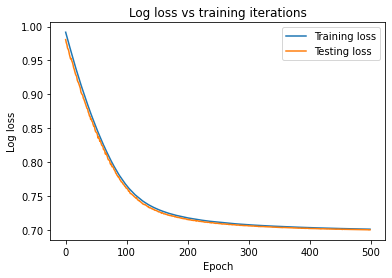

In [26]:
plt.plot(range(epochs), train_loss, label = "Training loss")
plt.plot(range(epochs), test_loss, label = "Testing loss")
plt.xlabel("Epoch")
plt.ylabel("Log loss")
plt.legend()
plt.title("Log loss vs training iterations")

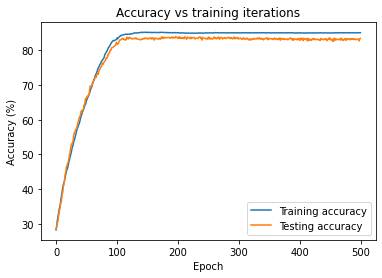

In [28]:
plt.plot(range(epochs), np.array(train_acc)*100, label = "Training accuracy")
plt.plot(range(epochs), np.array(test_acc)*100, label = "Testing accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.title("Accuracy vs training iterations");